<a href="https://colab.research.google.com/github/arjun-anapalli/Spectacles/blob/main/DT_PCA_and_LDA_on_iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This section compares both Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA), both applied on a same dataset (iris).
The main goal is to check which method captures most of the variance, and plot each model's outputs so that it would be easier to understand.

🔍 Eigenvalues and Explained Variance:

  Principal Component  Eigenvalue  Explained Variance Ratio
0                 PC1    2.938085                  0.729624
1                 PC2    0.920165                  0.228508

📊 Feature Loadings:

                        PC1       PC2
sepal length (cm)  0.521066  0.377418
sepal width (cm)  -0.269347  0.923296
petal length (cm)  0.580413  0.024492
petal width (cm)   0.564857  0.066942


<ipython-input-3-3285580749>:60: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


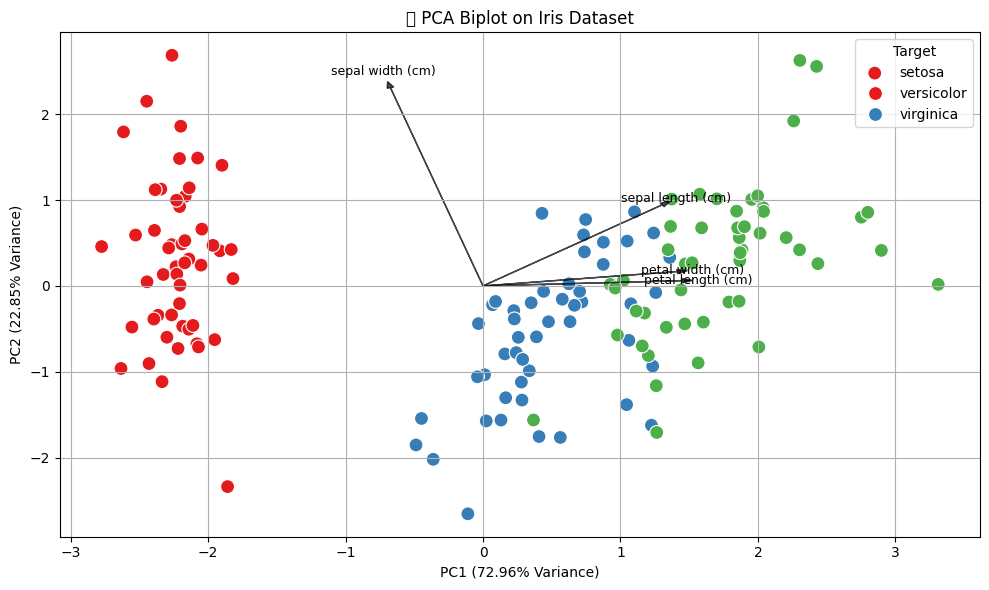

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data  # features
y = iris.target  # labels
feature_names = iris.feature_names
target_names = iris.target_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = y

explained_variance = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

# DataFrame for eigenvalues
eigen_df = pd.DataFrame({
    'Principal Component': ['PC1', 'PC2'],
    'Eigenvalue': eigenvalues,
    'Explained Variance Ratio': explained_variance
})
print(" Eigenvalues and Explained Variance:\n")
print(eigen_df)

# Calculate contribution of each feature to components
loadings = pca.components_.T
loadings_df = pd.DataFrame(loadings, index=feature_names, columns=['PC1', 'PC2'])
print("\n Feature Loadings:\n")
print(loadings_df)

# Biplot (scores + feature directions)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Target', palette='Set1', s=100)

# Add arrows for original feature directions
for i, feature in enumerate(feature_names):
    plt.arrow(0, 0, loadings[i, 0]*2.5, loadings[i, 1]*2.5,
              color='black', alpha=0.7, head_width=0.05)
    plt.text(loadings[i, 0]*2.7, loadings[i, 1]*2.7, feature, color='black',
             ha='center', va='center', fontsize=9)

plt.xlabel(f'PC1 ({explained_variance[0]*100:.2f}% Variance)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.2f}% Variance)')
plt.title(' PCA Biplot on Iris Dataset')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Target', labels=target_names)
plt.show()

🎯 LDA Explained Variance Ratio:

LD1: 99.12%, LD2: 0.88%


<ipython-input-2-3732723153>:43: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


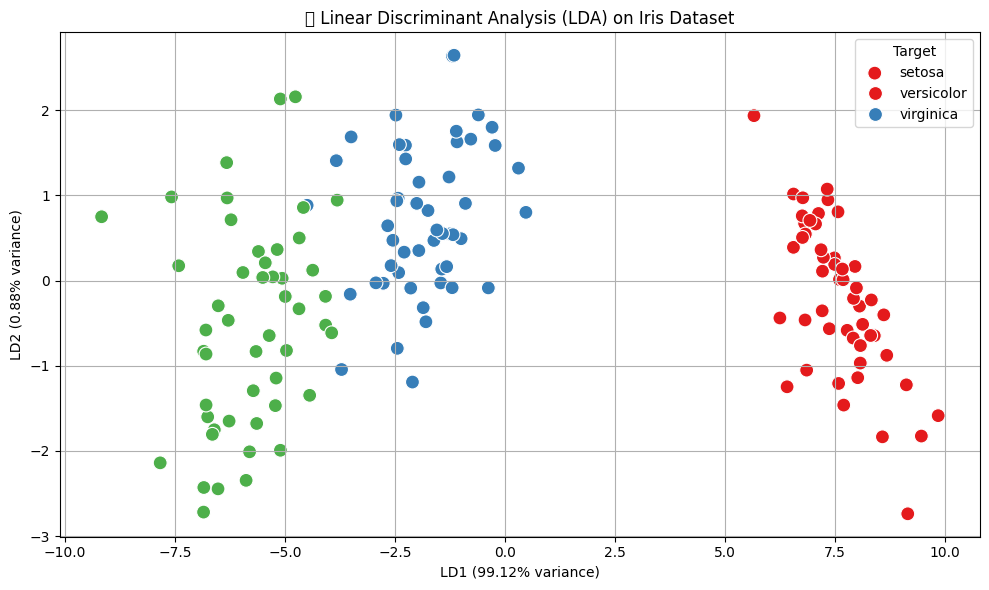

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply LDA (we can have at most (C-1) components for C classes; here: 3-1 = 2)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Create DataFrame for LDA output
df_lda = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
df_lda['Target'] = y

explained_variance_lda = lda.explained_variance_ratio_
print(" LDA Explained Variance Ratio:\n")
print(f"LD1: {explained_variance_lda[0]*100:.2f}%, LD2: {explained_variance_lda[1]*100:.2f}%")

# Plot LDA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_lda, x='LD1', y='LD2', hue='Target', palette='Set1', s=100)
plt.title(' Linear Discriminant Analysis (LDA) on Iris Dataset')
plt.xlabel(f'LD1 ({explained_variance_lda[0]*100:.2f}% variance)')
plt.ylabel(f'LD2 ({explained_variance_lda[1]*100:.2f}% variance)')
plt.grid(True)
plt.legend(title='Target', labels=target_names)
plt.tight_layout()
plt.show()

Results show that **PCA captures 95.8% of variance** within the data, whereas **LDA captures 100% variance of the data**, when its dimensions are reduced.